## Zadanie 1

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def of(I_org, I, J, W2=3, dy=3, dx=3):
    (Y,X) = I.shape
    u,v = np.zeros([Y,X]), np.zeros([Y,X])

    for j in range(W2+dy,Y-W2-dy):
        for i in range(W2+dx,X-W2-dx):
            I0 = np.float32(I[j-W2:j+W2+1,i-W2:i+W2+1])
            min_dist = float("inf")
            best_dx, best_dy = 0, 0
            for y in range(-dy,dy+1):
                for x in range(-dx,dx+1):
                    if j + y - W2 >= 0 and j + y + W2 < Y and i + x - W2 >= 0 and i + x + W2 < X:
                        J0 = np.float32(J[j+y-W2:j+y+W2+1,i+x-W2:i+x+W2+1])
                        dist = np.sum(np.sqrt(np.square(J0 - I0)))
                        if dist < min_dist:
                            min_dist = dist
                            best_dx, best_dy = x, y
            u[j,i] = best_dx
            v[j,i] = best_dy

    return u,v

def vis_flow(u, v, YX, name):
    mag, ang = cv2.cartToPolar(u, v)
    hsv = np.zeros([u.shape[0], u.shape[1], 3], dtype=np.uint8)
    hsv[:, :, 0] = ang * 90 / np.pi
    hsv[:, :, 1] = (mag / np.max(mag) * 255).astype(np.uint8)
    hsv[:, :, 2] = 255
    
    rgb_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_flow)
    plt.title(name)
    plt.axis("off")
    plt.show()
    
    plt.quiver(u, v)
    plt.gca().invert_yaxis()
    plt.title("Quiver Plot: " + name)
    plt.show()

(128, 128)


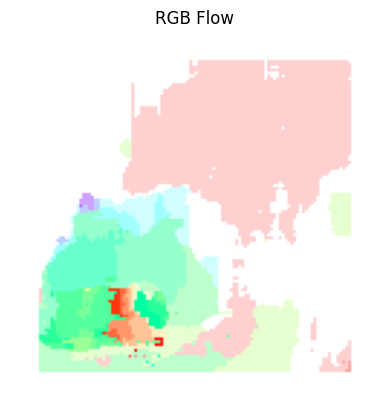

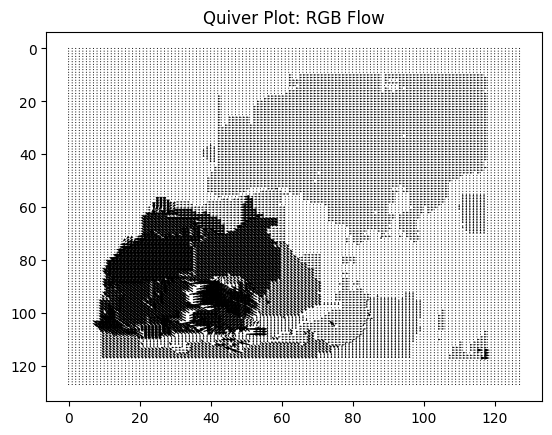

In [117]:
I = cv2.imread("cm1.png")
I = cv2.resize(I,(0,0), fx=0.5, fy=0.5)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

J = cv2.imread("cm2.png")
J = cv2.resize(J,(0,0), fx=0.5, fy=0.5)
J = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)
u,v = of(I,I,J,5,5,5)

vis_flow(u,v,I,"RGB Flow")

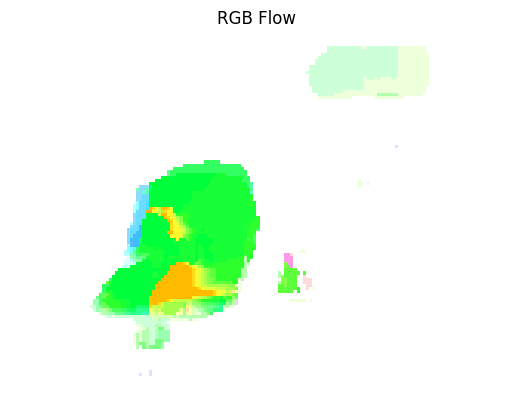

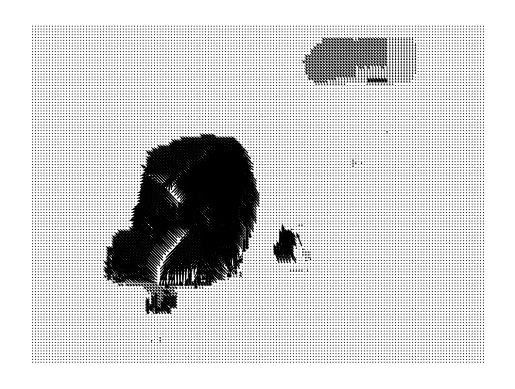

In [ ]:
I = cv2.imread("I.jpg")
I = cv2.resize(I,(0,0), fx=0.5, fy=0.5)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

J = cv2.imread("J.jpg")
J = cv2.resize(J,(0,0), fx=0.5, fy=0.5)
J = cv2.cvtColor(J, cv2.COLOR_BGR2GRAY)
u,v = of(I,I,J,5,5,5)

vis_flow(u,v,I,"RGB Flow")

## Zadanie 2

In [119]:

def pyramid(im, max_scale):
    images = [im]
    for k in range(1, max_scale):
        images.append(cv2.resize(images[k-1], (0, 0), fx=0.5, fy=0.5))
    return images

def multilayer_of(I_org, I, J, scales=3, W2=3, dy=3, dx=3):
    im_I = pyramid(cv2.cvtColor(I, cv2.COLOR_BGR2GRAY), 3)
    im_J = pyramid(cv2.cvtColor(J, cv2.COLOR_BGR2GRAY), 3)
    I_c = im_I[-1]
    u_total = np.zeros(im_I[-1].shape)
    v_total = np.zeros(im_I[-1].shape)
    for i in range(scales):
        u,v = of(I_c, im_J[scales-i-1],W2,dy,dx)
        I_new = I_c.copy()
        for x in range(I_new.shape[0]):
            for y in range(I_new.shape[1]):
                I_new[x + int(u[x,y]), y + int(v[x,y])] = I_c[x,y]
        u_total = u_total+u
        v_total = v_total+v
        if(i != scales -1):
            I_c = cv2.resize(I_new, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
            u_total = cv2.resize(u_total, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)*2
            v_total = cv2.resize(v_total, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)*2
    return u_total,v_total


In [120]:
I = cv2.imread("I.jpg")
J = cv2.imread("J.jpg")

u, v = multilayer_of(I,I,J,3,3,3,3)
vis_flow(u,v,I,"Multilayer")

TypeError: 'int' object is not subscriptable

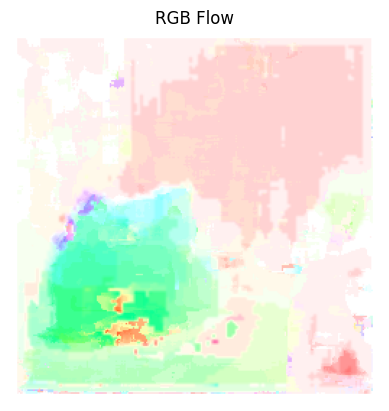

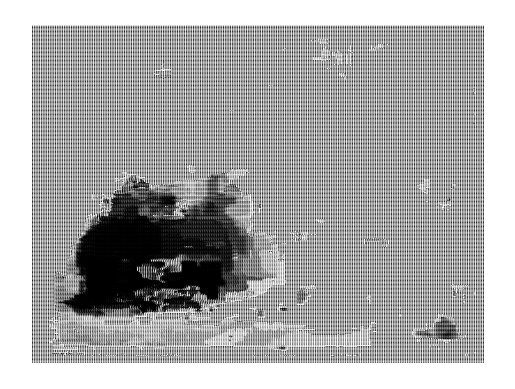

In [10]:
I = cv2.imread("cm1.png")
J = cv2.imread("cm2.png")

u, v = multilayer_of(I,I,J,2,5,5,5)
vis_flow(u,v,0,0)